## Setup environment

To run the notebook, please create a `.env` file like the following example: 

```BASH
OPENAI_API_KEY=<your_openai_api_key>
OPENAI_MODEL=gpt-4-turbo
TAVILY_API_KEY=<your_tavily_api_key>
```

In [1]:
from dotenv import load_dotenv

load_dotenv() 


True

## Build a "normal" chatbot

In [2]:
from rigorous_llm.graph_builders import create_default_casual_chatbot_graph_builder 

basic_casual_chatbot_graph = create_default_casual_chatbot_graph_builder() 

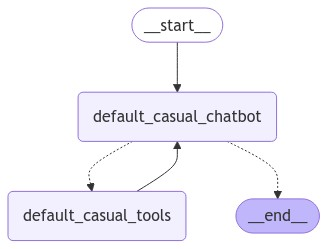

In [3]:
from IPython.display import Image, display

try:
    display(Image(basic_casual_chatbot_graph.compile().get_graph().draw_mermaid_png()))
except Exception:
    pass

## Build the rigorous LLM with the "normal" chatbot

In [4]:
from rigorous_llm.graph_builders import create_rigorous_llm_graph 

rigorous_llm_graph_builder = create_rigorous_llm_graph(
    chatbot_subgraph=basic_casual_chatbot_graph
)

rigorous_llm = rigorous_llm_graph_builder.compile() 

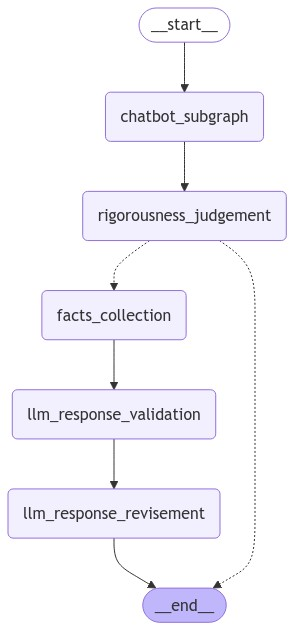

In [5]:
from IPython.display import Image, display

try:
    img = Image(rigorous_llm.get_graph().draw_mermaid_png())
    display(img)
except Exception:
    pass

## Test-drive rigorous LLM

In [6]:
def stream_graph_updates(user_input: str):
    for event in rigorous_llm.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Event", value)
            if ("messages" in value): 
                print("Assistant:", value["messages"][-1].content)

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    stream_graph_updates(user_input)

    # Just accept one request for now 
    break 

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Event {'rigorousness_required': False, 'messages': [HumanMessage(content='who is Wei-Fan', additional_kwargs={}, response_metadata={}, id='5529c5c6-58d7-4818-a9ec-9481e4be9c32'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_EgkoPVBR8VXS9vWY6zYoJHyR', 'function': {'arguments': '{"query":"Wei-Fan"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 86, 'total_tokens': 106, 'prompt_tokens_details': {'cached_tokens': 0}, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4e9d7751-1866-45e4-b74d-8a88b9292258-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Wei-Fan'}, 'id': 'call_EgkoPVBR8VXS9vWY6zYoJHyR', 'type': 'tool_call'}], usage_metadata={'input_tokens': 86, 'output_tokens': 20, 'total_tokens': 106}), ToolMes

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Judgement of the need of rigorousness: True
INFO:root:Extracting facts from tool messages: ee1e699c-eaa3-41ac-9b51-5ffd08ad7bb1


Event {'rigorousness_required': True}


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Event {'facts': {'ee1e699c-eaa3-41ac-9b51-5ffd08ad7bb1': ['Wei Fan is a Professor of Chemical Engineering at the University of Massachusetts Amherst.', 'Wei Fan is the Edward S. Price Faculty Fellow in Chemical Engineering.', 'Wei Fan is an iCons Faculty Fellow from 2022 to 2024.', "Wei Fan's research group focuses on the rational synthesis of nanoporous materials for biorefinery catalysts and drug delivery carriers.", "Wei Fan's research involves engineering the pore structure, size, and surface properties of materials.", "Wei Fan's work includes zeolite catalysis separation and drug delivery.", 'Wei Fan received his B.S. from the University of Science and Technology of China in 2000.', 'Wei Fan earned his Ph.D. from The University of Tokyo in 2007.', 'Wei Fan is located at 157B, Goessmann Laboratory, 686 North Pleasant St. Amherst, MA 01003.', 'Wei Fan can be contacted at Tel: (413) 545-1750.']}}


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:4 statements extracted from the last AI message
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:4 statements passed the validation


Event {'validated_statements': ['Wei-Fan is a professor of Chemical Engineering at the University of Massachusetts Amherst.', "Wei-Fan's research focuses on the rational synthesis of nanoporous materials for catalysts in biorefinery and drug delivery carriers.", "Wei-Fan's research also focuses on engineering the pore structure and size, as well as surface properties of nanoporous materials.", 'More information about Wei-Fan can be found on the University of Massachusetts Amherst website.']}


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Event {'rigorousness_required': False, 'messages': [HumanMessage(content='Please revise rigorously', additional_kwargs={}, response_metadata={}, id='e7d88dd0-4cf6-461a-9f44-1c7ddbd77c5b'), AIMessage(content='Wei-Fan is a professor of Chemical Engineering at the University of Massachusetts Amherst. His research focuses on the rational synthesis of nanoporous materials for catalysts in biorefinery and drug delivery carriers, as well as engineering the pore structure, size, and surface properties of these materials. More information about Wei-Fan can be found on the University of Massachusetts Amherst website.', additional_kwargs={}, response_metadata={}, id='81815421-c44c-4917-81d7-5d26203c494e')], 'validated_statements': []}
Assistant: Wei-Fan is a professor of Chemical Engineering at the University of Massachusetts Amherst. His research focuses on the rational synthesis of nanoporous materials for catalysts in biorefinery and drug delivery carriers, as well as engineering the pore stru